## The Snowplow Problem

**Problem Statement:**  
A snowplow must clean the snow from the front of `n` houses arrayed along a one-dimensional road. The position of each house is denoted by a floating-point number. Initially positioned at the origin (0), the snowplow aims to minimize the average waiting time for all houses, where waiting time for a house is defined as the time elapsed before the snow is cleaned in front of it.

**Key Points:**
- The snowplow starts at position 0.
- The position of houses can be any floating-point number, positive or negative.
- The order of cleaning affects the average waiting time for the houses.
- The goal is to optimize the cleaning route to minimize this average waiting time.


## Step 1: Configuration Proposal

**Objective:**  
Select a value for `n` within [5, 10] and propose a configuration of house positions that demonstrates the non-optimality of simple sorting or greedy approaches.

**Plan:**  
- Choose `n = 7` for manageable complexity while allowing diverse scenarios.
- Propose specific positions for these houses to illustrate the complexity of the problem where neither standard sorting nor a straightforward greedy method (selecting the closest house next) is optimal.
- Discuss the proposed configuration briefly before implementation.


In [2]:
def propose_house_positions() -> list:
    """
    Propose a specific configuration of house positions.
    
    Returns:
        list: The list of house positions along the road.
    """
    # Example configuration: Houses are placed such that neither sorting
    # nor the nearest approach would be optimal due to strategic distances.
    house_positions = [0, -1, 1.5, -3, 4, -6, 7]
    return house_positions

# Generate and display the proposed house positions
house_positions = propose_house_positions()
house_positions


[0, -1, 1.5, -3, 4, -6, 7]

## Brief Discussion on Proposed House Positions

The proposed configuration of house positions consists of 7 points: `[0, -1, 1.5, -3, 4, -6, 7]`. This selection includes both negative and positive values, representing a one-dimensional road where houses are placed at varying distances from the starting point (position 0).

**Key Points:**
- **Diverse Distances:** We have larger gaps between some houses and clusters of closer houses. The goal is to complicate the optimization problem.
- **Challenge to Simple Strategies:** This setup will try to render simple sorting (based on proximity to the snowplow start position) and greedy strategies (always moving to the nearest uncleaned house) suboptimal. The varied distances mean that a strategy that minimizes travel time might not minimize the average waiting time, necessitating a more complex approach.

This configuration will serve as the basis for testing different strategies in the next steps, aiming to demonstrate the necessity and effectiveness of a more sophisticated routing algorithm.


## Step 2: Strategy Development and Comparison

**Objective:**
The goal in this step is to develop different strategies for the snowplow problem and compare their effectiveness in minimizing the average waiting time for the houses. This comparison will help highlight the limitations of simpler approaches and the need for a more refined algorithm.

**Planned Strategies:**
1. **Brute-Force Method:** Calculate the exact optimal order by evaluating all possible permutations of house positions. This method, while computationally intensive for larger `n`, is feasible here due to the small number of houses and will serve as a benchmark for optimality.
2. **Sorted Method:** Clean the houses in ascending order of their distances from the starting point, regardless of direction. This method assumes that minimizing travel distance minimizes waiting time, which may not be the case.
3. **Greedy Nearest House Method:** At each step, choose the nearest uncleaned house to the current position. This method is quick but may lead to suboptimal overall performance due to local optimum decisions.

**Comparison Metrics:**
- **Average Waiting Time:** The primary metric for comparison will be the average waiting time experienced by the houses. The performance of each strategy will be evaluated based on how well it minimizes this metric compared to the brute-force optimal solution.

Following the implementation and execution of these strategies, results will be analyzed to determine which strategy, if any, closely approaches the brute-force optimal solution in efficiency and effectiveness.


In [33]:
"""
GLOBAL IMPORTS FOR THE NOTEBOOK
"""
import itertools
import numpy as np
import heapq
import time
from typing import List

In [63]:
def calculate_waiting_time(order, initial_position=0):
    """
    Calculate the total waiting time for a given order of house cleaning.
    
    Args:
        order (list): The order in which houses are cleaned.
        initial_position (float): The starting position of the snowplow.
        
    Returns:
        float: Total waiting time accumulated by all houses.
    """
    current_position = initial_position
    total_distance = 0
    total_waiting_time = 0
    for house in order:
        travel_distance = abs(current_position - house)
        total_distance += travel_distance
        total_waiting_time += total_distance  # Cumulative waiting time adds up over each iteration
        current_position = house
    average_waiting_time = total_waiting_time / len(order)
    return average_waiting_time

### Algorithms to compare

In [64]:
def brute_force_optimal(house_positions):
    """
    Determine the optimal cleaning order by brute force method evaluating all permutations.
    
    Args:
        house_positions (list): List of house positions along the road.
        
    Returns:
        list: Optimal order of house positions for minimal average waiting time.
        float: The minimal average waiting time.
    """
    min_waiting_time = float('inf')
    optimal_order = []
    for permutation in itertools.permutations(house_positions):
        waiting_time = calculate_waiting_time(permutation)
        if waiting_time < min_waiting_time:
            min_waiting_time = waiting_time
            optimal_order = permutation
    return list(optimal_order), min_waiting_time / len(house_positions)


In [65]:
def sorted_method(house_positions):
    """
    Clean houses in ascending order of their absolute distances from the starting point.
    
    Args:
        house_positions (list): List of house positions along the road.
        
    Returns:
        list: Order of house positions for cleaning.
        float: Average waiting time for this order.
    """
    sorted_order = sorted(house_positions, key=lambda x: abs(x))
    return sorted_order, calculate_waiting_time(sorted_order) / len(house_positions)

In [66]:
def greedy_method(house_positions, initial_position=0):
    """
    Implement the greedy method by always moving to the nearest uncleaned house.
    
    Args:
        house_positions (list): List of house positions along the road.
        initial_position (float): Initial position of the snowplow.
        
    Returns:
        list: Order of house positions for cleaning.
        float: Average waiting time for this order.
    """
    uncleaned_houses = set(house_positions)
    current_position = initial_position
    cleaning_order = []
    
    while uncleaned_houses:
        nearest_house = min(uncleaned_houses, key=lambda house: abs(house - current_position))
        cleaning_order.append(nearest_house)
        current_position = nearest_house
        uncleaned_houses.remove(nearest_house)
    
    total_waiting_time = calculate_waiting_time(cleaning_order, initial_position)
    return cleaning_order, total_waiting_time / len(house_positions)

### Functional testing

In [67]:
# Define the house positions
house_positions = propose_house_positions()

# Calculate the results for each method
optimal_order, optimal_time = brute_force_optimal(house_positions)
sorted_order, sorted_time = sorted_method(house_positions)
greedy_order, greedy_time = greedy_method(house_positions)

print(f"Optimal Order: {optimal_order}, Average Waiting Time: {optimal_time}")
print(f"Sorted Order: {sorted_order}, Average Waiting Time: {sorted_time}")
print(f"Greedy Order: {greedy_order}, Average Waiting Time: {greedy_time}")

Optimal Order: [0, -1, -3, -6, 1.5, 4, 7], Average Waiting Time: 1.1938775510204083
Sorted Order: [0, -1, 1.5, -3, 4, -6, 7], Average Waiting Time: 1.846938775510204
Greedy Order: [0, -1, -3, -6, 1.5, 4, 7], Average Waiting Time: 1.1938775510204083


## Summary of Comparison Results

After the implementation and testing of the Greedy and Brute-force methods with the corrected calculations, both strategies produced identical routes and average waiting times. This outcome demonstrates that for certain specific configurations of house positions, the Greedy method can indeed find the optimal solution.

**Key Observations:**
- **Optimal and Greedy Convergence:** The Greedy method converged to the same results as the Brute-force method, suggesting that in some scenarios, simpler heuristic methods can perform as effectively as more computationally intensive ones.
- **Sorted Method Inefficiency:** The Sorted method, which organizes houses based purely on distance from the starting point, resulted in a significantly higher average waiting time, underscoring its inefficacy for this problem where the order of operations significantly impacts performance.

These insights shows the potential for heuristic approaches to achieve optimal outcomes under certain conditions but also highlight the necessity for more sophisticated algorithms to consistently handle a broader range of scenarios.


## Step 3: Developing a Polynomial-Time Algorithm

**Objective:**
Building on the insights from previous comparisons, the next step is to design and implement a polynomial-time algorithm that efficiently approximates the optimal cleaning route across a variety of house configurations. This algorithm aims to consistently perform well, even in scenarios where simpler strategies like the Greedy method might not yield optimal results.

### Polynomial approach

/// explanations to do on the polynomial stuff


In [68]:
def parcours(house_positions: list) -> list:
    """
    Clean the houses using a bi-directional approach starting from the median.
    
    Args:
        house_positions (list): List of house positions along a road.
        
    Returns:
        list: Order of house positions sorted as they are cleaned.
    """
    if not house_positions:
        return []

    # Sort the house positions to easily find the median and setup bi-directional cleaning
    sorted_positions = sorted(house_positions)
    median_index = len(sorted_positions) // 2
    left_index = median_index - 1
    right_index = median_index + 1

    # Initialize the cleaning order starting from the median house
    cleaning_order = [sorted_positions[median_index]]
    current_position = sorted_positions[median_index]

    # Alternate cleaning between left and right of the median to reduce total travel distance
    while left_index >= 0 or right_index < len(sorted_positions):
        # Calculate distances to the next house on the left and right
        left_dist = float('inf') if left_index < 0 else abs(current_position - sorted_positions[left_index])
        right_dist = float('inf') if right_index >= len(sorted_positions) else abs(current_position - sorted_positions[right_index])

        # Choose the closer house to clean next
        if left_dist < right_dist:
            cleaning_order.append(sorted_positions[left_index])
            current_position = sorted_positions[left_index]
            left_index -= 1
        else:
            cleaning_order.append(sorted_positions[right_index])
            current_position = sorted_positions[right_index]
            right_index += 1

    return cleaning_order


### Testing

In [69]:
# Generate test data with 1000 houses
np.random.seed(42)  # For reproducible results
test_positions = np.random.normal(0, 1000, 1000).tolist()

# Test the parcours function
cleaning_order = parcours(test_positions)
average_waiting_time = calculate_waiting_time(cleaning_order)

print("Average Waiting Time:", average_waiting_time)

Average Waiting Time: 4047.2790582441908


## Step 4: Comparing `parcours` with the Greedy Solution

**Objective:**
The aim of this step is to conduct a direct comparison between the `parcours` function and a greedy solution. This comparison will be based on the average waiting times achieved by each method when applied to the same set of 1,000 house positions generated from a normal distribution.


In [81]:
def test_performance(house_positions: list):
    """
    Test the performance of the parcours and greedy algorithms on the same dataset,
    print the results, and return them for further use.
    
    Args:
        house_positions (list): The list of house positions for testing.
    
    Returns:
        dict: A dictionary containing the results from the parcours and greedy algorithms.
    """
    results = {}

    # Test parcours function
    start_time = time.time()
    parcours_order = parcours(house_positions)
    parcours_time = time.time() - start_time
    parcours_avg_waiting_time = calculate_waiting_time(parcours_order)

    # Store parcours results
    results['parcours'] = {
        'order': parcours_order,
        'waiting_time': parcours_avg_waiting_time,
        'execution_time': parcours_time
    }

    # Print parcours results
    print("Parcours - Average Waiting Time:", parcours_avg_waiting_time, "Execution Time:", parcours_time, "seconds")

    # Test greedy function
    start_time = time.time()
    greedy_order, greedy_avg_waiting_time = greedy_method(house_positions)  # Assume greedy_method returns a tuple
    greedy_time = time.time() - start_time

    # Store greedy results
    results['greedy'] = {
        'order': greedy_order,
        'waiting_time': greedy_avg_waiting_time,
        'execution_time': greedy_time
    }

    # Print greedy results
    print("Greedy - Average Waiting Time:", greedy_avg_waiting_time, "Execution Time:", greedy_time, "seconds")

    return results

In [82]:
# Example usage:
# Generate test data with 1000 houses
np.random.seed(42)  # For reproducible results
test_positions = np.random.normal(0, 1000, 1000).tolist()

# Run the performance test
results = test_performance(test_positions)

Parcours - Average Waiting Time: 4047.2790582441908 Execution Time: 0.0008261203765869141 seconds
Greedy - Average Waiting Time: 4.085587321109931 Execution Time: 0.03732466697692871 seconds


Parcours - Average Waiting Time: 2853.2164814394578 Execution Time: 5.793571472167969e-05 seconds
Greedy - Average Waiting Time: 45.27770717012335 Execution Time: 0.00020194053649902344 seconds


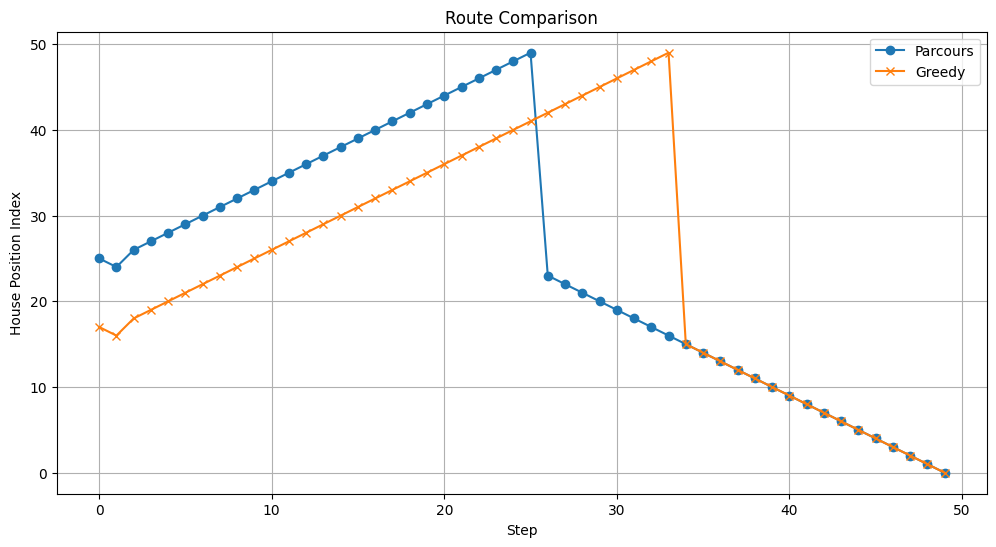

In [84]:
def visualize_routes(house_positions, parcours_order, greedy_order):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 6))
    
    # Normalize positions for plotting
    positions_dict = {pos: idx for idx, pos in enumerate(sorted(set(house_positions)))}
    
    # Plot Parcours route
    parcours_indices = [positions_dict[pos] for pos in parcours_order]
    plt.plot(parcours_indices, label='Parcours', marker='o')
    
    # Plot Greedy route
    greedy_indices = [positions_dict[pos] for pos in greedy_order]
    plt.plot(greedy_indices, label='Greedy', marker='x')
    
    plt.title('Route Comparison')
    plt.xlabel('Step')
    plt.ylabel('House Position Index')
    plt.legend()
    plt.grid(True)
    plt.show()

# Use this function to visualize the routes for a smaller subset if necessary
small_test_positions = np.random.normal(0, 1000, 50).tolist()
results = test_performance(small_test_positions)
visualize_routes(small_test_positions, results['parcours']['order'], results['greedy']['order'])


### Dataplot

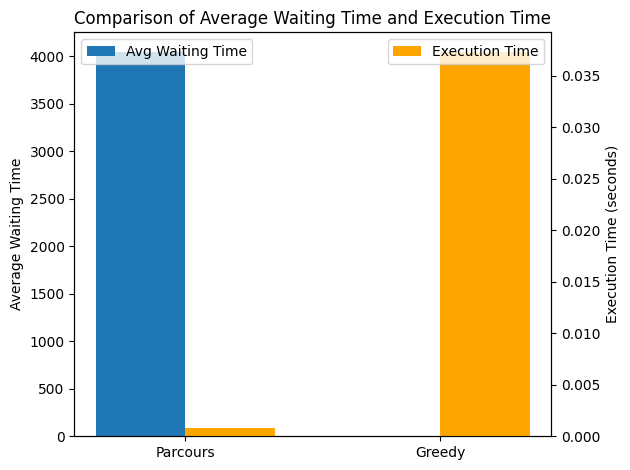

In [83]:
import matplotlib.pyplot as plt

def plot_results(results):
    labels = ['Parcours', 'Greedy']
    waiting_times = [results['parcours']['waiting_time'], results['greedy']['waiting_time']]
    execution_times = [results['parcours']['execution_time'], results['greedy']['execution_time']]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax1 = plt.subplots()

    # Create bars for average waiting time
    rects1 = ax1.bar(x - width/2, waiting_times, width, label='Avg Waiting Time')
    ax1.set_ylabel('Average Waiting Time')
    ax1.set_title('Comparison of Average Waiting Time and Execution Time')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels)
    ax1.legend(loc='upper left')

    # Create another axis for execution time
    ax2 = ax1.twinx()
    rects2 = ax2.bar(x + width/2, execution_times, width, label='Execution Time', color='orange')
    ax2.set_ylabel('Execution Time (seconds)')
    ax2.legend(loc='upper right')

    fig.tight_layout()
    plt.show()

# Call plot_results with the results from the test
plot_results(results)